In [1]:
#General stuff
import time
import datetime
import glob
import re
import pandas as pd
from collections import Counter
import progressbar
import jellyfish
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np
import statsmodels.formula.api as smf
from collections import Counter
from itertools import chain

## Pulling in all the files

In [2]:
df = pd.read_csv('data/df_final_harm.csv')

## I want to look for repetitions "sozialrechtliche Abteilungen"
And I'm working with the years, as the whole long string consisting of 15'000 verdicts is just too long. The Kernel dies regularly. Which really isn't much fun.

In [3]:
df_sozrecht = df[df['recht_harm'] == 'Öffentliches Recht']
sozrecht = df_sozrecht[df_sozrecht['Language'] == 'Fr']['Text-Nummer']

Splitting up the lists.

In [4]:
l = list(sozrecht)
n = 1000
txt_lsts = [l[i:i + n] for i in range(0, len(l), n)]

In [7]:
df_ = pd.DataFrame(columns=['index', 0])
bar = progressbar.ProgressBar()

for txt_lst, i in zip(txt_lsts, bar(range(len(txt_lsts)))):

    long_str = ''
    
    for txt in txt_lst:
    
        file = open('txt_files/' + txt, 'r')
        text = file.read()
        #Making sure the line breaks '/n', 'xa0' and double spaces are removed
        text = text.replace('\n', ' ').replace('\xa0', '').replace('  ', ' ')
        #Removing these automated notifications
        text = text.replace('Wichtiger Hinweis:Diese Website wird in älteren Versionen von Netscape ohne graphische Elemente dargestellt. Die Funktionalität der Website ist aber trotzdem gewährleistet. Wenn Sie diese Website regelmässig benutzen, empfehlen wir Ihnen, auf Ihrem Computer einen aktuellen Browser zu installieren.Zurück zur Einstiegsseite Drucken Grössere Schrift', '')
        text = text.replace('Vorwärts ähnliche Leitentscheide suchenähnliche Urteile ab 2000 suchen Drucken nach oben', '')
        text = text.replace('Bundesgericht Tribunal fédéral Tribunale federale Tribunal federal', '')
        text = text.replace('Navigation Neue Suche Zurück zum Suchresultat Rang: Zurück 180', '')
        text = text.replace('Navigation Neue Suche Zurück zum Suchresultat Rang:1 ähnliche Leitentscheide suchenähnliche Urteile ab 2000 suchen Drucken nach oben', '')
    
        long_str = long_str + text
        
    df_new = pd.DataFrame(pd.Series( long_str[ix:ix+500] for ix in list(range(len(long_str))) ).value_counts()).reset_index()
    df_new = df_new[df_new[0]> 1]
    
    frames = [df_, df_new]
    df_ = pd.concat(frames)
    

 88% (8 of 9) |########################    | Elapsed Time: 0:07:47 ETA: 0:00:58

# Deleting Duplicates

In [8]:
df_.columns = [['String', 'Count']]

In [9]:
df_ = df_.drop_duplicates(subset='String', keep='first')

In [10]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2261164 entries, 0 to 25942
Data columns (total 2 columns):
String    object
Count     float64
dtypes: float64(1), object(1)
memory usage: 51.8+ MB


In [11]:
df = df_[df_['Count'] >= 10]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30831 entries, 0 to 911
Data columns (total 2 columns):
String    30831 non-null object
Count     30831 non-null float64
dtypes: float64(1), object(1)
memory usage: 722.6+ KB


# Matching similar Strings
Using Jellyfish and remodelling the original df, using it to create a new list of string. Because these ones are the ones I don't need to consider anymore.

In [13]:
df_new = pd.DataFrame(columns=['String', 'Count', 'Jaro'])

for count in range(1000):
    
    print(count)
    string_list = list(df['String'])
    value_list = []
    bar = progressbar.ProgressBar()

    for elem, i in zip(string_list, bar(range(len(string_list)))):
    
        value = jellyfish.jaro_distance(string_list[0], elem)
        value_list.append(value)
    
    df['Jaro'] = value_list
    df_unique = df[df['Jaro'] >= .825].head(1)

    frames = [df_new, df_unique]
    df_new = pd.concat(frames)

    df = df[df['Jaro'] <= .825]
    del df['Jaro']

  2% (781 of 30831) |                      | Elapsed Time: 0:00:00 ETA: 0:00:04

0


 98% (30441 of 30831) |################### | Elapsed Time: 0:00:04 ETA: 0:00:00/Users/barneyjs/.virtualenvs/master/lib/python3.5/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
  3% (1168 of 30741) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

1


  3% (1166 of 30697) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

2


  3% (1165 of 30657) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

3


  3% (1161 of 30552) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

4


  3% (1160 of 30530) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

5


  3% (1158 of 30489) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

6


  3% (1156 of 30424) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

7


  3% (1152 of 30329) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

8


  3% (1150 of 30274) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

9


  3% (1150 of 30259) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

10


  3% (1146 of 30162) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

11


  3% (1143 of 30078) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

12


  2% (761 of 30021) |                      | Elapsed Time: 0:00:00 ETA: 0:00:05

13


  3% (1140 of 30018) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

14


  2% (760 of 30017) |                      | Elapsed Time: 0:00:00 ETA: 0:00:05

15


  3% (1140 of 29994) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

16


  3% (1137 of 29937) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

17


  3% (1136 of 29891) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

18


  3% (1136 of 29890) |                     | Elapsed Time: 0:00:00 ETA: 0:00:03

19


  3% (1133 of 29815) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

20


  3% (1132 of 29787) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

21


  3% (1130 of 29750) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

22


  3% (1128 of 29690) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

23


  3% (1128 of 29681) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

24


  3% (1128 of 29678) |                     | Elapsed Time: 0:00:00 ETA: 0:00:03

25


  3% (1123 of 29549) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

26


  3% (1121 of 29495) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

27


  1% (373 of 29461) |                      | Elapsed Time: 0:00:00 ETA: 0:00:11

28


  2% (743 of 29330) |                      | Elapsed Time: 0:00:00 ETA: 0:00:05

29


  3% (1113 of 29290) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

30


  3% (1113 of 29288) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

31


  2% (740 of 29212) |                      | Elapsed Time: 0:00:00 ETA: 0:00:06

32


  2% (738 of 29149) |                      | Elapsed Time: 0:00:00 ETA: 0:00:05

33


  3% (1106 of 29119) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

34


  3% (1103 of 29033) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

35


  3% (1102 of 29001) |                     | Elapsed Time: 0:00:00 ETA: 0:00:03

36


  3% (1100 of 28959) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

37


  3% (1099 of 28935) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

38


  3% (1098 of 28899) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

39


  3% (1097 of 28874) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

40


  3% (1097 of 28864) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

41


  3% (1095 of 28825) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

42


  3% (1092 of 28756) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

43


  3% (1092 of 28749) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

44


  3% (1092 of 28737) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

45


  3% (1092 of 28736) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

46


  3% (1092 of 28734) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

47


  3% (1090 of 28703) |                     | Elapsed Time: 0:00:00 ETA: 0:00:03

48


  3% (1087 of 28624) |                     | Elapsed Time: 0:00:00 ETA: 0:00:03

49


  3% (1085 of 28548) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

50


  3% (1082 of 28473) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

51


  3% (1079 of 28401) |                     | Elapsed Time: 0:00:00 ETA: 0:00:03

52


  3% (1076 of 28311) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

53


  3% (1073 of 28237) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

54


  3% (1070 of 28158) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

55


  3% (1068 of 28103) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

56


  3% (1066 of 28048) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

57


  3% (1064 of 28003) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

58


  3% (1062 of 27941) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

59


  3% (1061 of 27916) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

60


  3% (1059 of 27861) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

61


  3% (1058 of 27840) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

62


  3% (1057 of 27811) |                     | Elapsed Time: 0:00:00 ETA: 0:00:03

63


  2% (704 of 27773) |                      | Elapsed Time: 0:00:00 ETA: 0:00:05

64


  3% (1054 of 27750) |                     | Elapsed Time: 0:00:00 ETA: 0:00:03

65


  3% (1054 of 27737) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

66


  3% (1053 of 27726) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

67


  3% (1053 of 27707) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

68


  2% (702 of 27690) |                      | Elapsed Time: 0:00:00 ETA: 0:00:04

69


  3% (1051 of 27676) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

70


  3% (1051 of 27674) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

71


  5% (1400 of 27648) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

72


  5% (1400 of 27643) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

73


  3% (1049 of 27610) |                     | Elapsed Time: 0:00:00 ETA: 0:00:04

74


  3% (1049 of 27609) |                     | Elapsed Time: 0:00:00 ETA: 0:00:03

75


  3% (1047 of 27561) |                     | Elapsed Time: 0:00:00 ETA: 0:00:03

76


  5% (1387 of 27458) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

77


  3% (1042 of 27425) |                     | Elapsed Time: 0:00:00 ETA: 0:00:03

78


  3% (1041 of 27390) |                     | Elapsed Time: 0:00:00 ETA: 0:00:03

79


  5% (1384 of 27327) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

80


  2% (691 of 27288) |                      | Elapsed Time: 0:00:00 ETA: 0:00:04

81


  3% (1035 of 27230) |                     | Elapsed Time: 0:00:00 ETA: 0:00:03

82


  5% (1375 of 27156) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

83


  3% (1030 of 27101) |                     | Elapsed Time: 0:00:00 ETA: 0:00:03

84


  4% (1326 of 27043) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

85


  5% (1367 of 26979) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

86


  3% (1023 of 26922) |                     | Elapsed Time: 0:00:00 ETA: 0:00:03

87


  5% (1361 of 26870) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

88


  5% (1360 of 26842) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

89


  3% (1019 of 26831) |                     | Elapsed Time: 0:00:00 ETA: 0:00:03

90


  3% (1016 of 26737) |                     | Elapsed Time: 0:00:00 ETA: 0:00:03

91


  5% (1353 of 26714) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

92


  3% (1015 of 26712) |                     | Elapsed Time: 0:00:00 ETA: 0:00:03

93


  3% (1014 of 26681) |                     | Elapsed Time: 0:00:00 ETA: 0:00:03

94


  5% (1351 of 26667) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

95


  3% (1013 of 26657) |                     | Elapsed Time: 0:00:00 ETA: 0:00:03

96


  5% (1346 of 26621) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

97


  3% (988 of 26582) |                      | Elapsed Time: 0:00:00 ETA: 0:00:03

98


  5% (1344 of 26579) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

99


  3% (1008 of 26535) |                     | Elapsed Time: 0:00:00 ETA: 0:00:03

100


  3% (1007 of 26497) |                     | Elapsed Time: 0:00:00 ETA: 0:00:03

101


  3% (1007 of 26492) |                     | Elapsed Time: 0:00:00 ETA: 0:00:03

102


  2% (671 of 26482) |                      | Elapsed Time: 0:00:00 ETA: 0:00:03

103


  3% (1000 of 26477) |                     | Elapsed Time: 0:00:00 ETA: 0:00:03

104


  3% (1005 of 26458) |                     | Elapsed Time: 0:00:00 ETA: 0:00:03

105


  3% (1005 of 26441) |                     | Elapsed Time: 0:00:00 ETA: 0:00:03

106


  3% (1004 of 26432) |                     | Elapsed Time: 0:00:00 ETA: 0:00:03

107


  5% (1339 of 26430) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

108


  5% (1339 of 26429) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

109


  5% (1333 of 26312) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

110


  5% (1329 of 26231) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

111


  3% (994 of 26174) |                      | Elapsed Time: 0:00:00 ETA: 0:00:03

112


  5% (1322 of 26109) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

113


  5% (1321 of 26085) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

114


  5% (1318 of 26029) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

115


  3% (986 of 25956) |                      | Elapsed Time: 0:00:00 ETA: 0:00:03

116


  5% (1312 of 25893) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

117


  5% (1307 of 25809) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

118


  4% (1271 of 25698) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

119


  5% (1288 of 25612) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

120


  5% (1293 of 25518) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

121


  5% (1288 of 25420) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

122


  5% (1283 of 25338) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

123


  5% (1280 of 25279) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

124


  5% (1278 of 25228) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

125


  3% (956 of 25155) |                      | Elapsed Time: 0:00:00 ETA: 0:00:03

126


  5% (1271 of 25083) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

127


  5% (1268 of 25040) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

128


  5% (1264 of 24953) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

129


  5% (1260 of 24885) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

130


  5% (1258 of 24842) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

131


  5% (1255 of 24776) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

132


  5% (1252 of 24720) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

133


  3% (937 of 24651) |                      | Elapsed Time: 0:00:00 ETA: 0:00:03

134


  5% (1247 of 24619) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

135


  5% (1244 of 24552) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

136


  5% (1240 of 24473) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

137


  5% (1238 of 24439) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

138


  5% (1234 of 24364) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

139


  5% (1231 of 24305) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

140


  5% (1230 of 24273) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

141


  3% (920 of 24208) |                      | Elapsed Time: 0:00:00 ETA: 0:00:03

142


  5% (1225 of 24179) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

143


  5% (1222 of 24124) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

144


  5% (1220 of 24083) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

145


  5% (1214 of 23967) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

146


  5% (1212 of 23927) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

147


  5% (1211 of 23908) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

148


  5% (1210 of 23882) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

149


  5% (1207 of 23830) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

150


  5% (1203 of 23750) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

151


  5% (1202 of 23738) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

152


  3% (900 of 23692) |                      | Elapsed Time: 0:00:00 ETA: 0:00:03

153


  5% (1197 of 23632) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

154


  5% (1196 of 23616) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

155


  5% (1196 of 23612) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

156


  5% (1192 of 23532) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

157


  5% (1191 of 23504) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

158


  5% (1187 of 23429) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

159


  5% (1185 of 23388) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

160


  5% (1184 of 23378) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

161


  5% (1183 of 23347) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

162


  5% (1181 of 23318) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

163


  5% (1181 of 23306) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

164


  5% (1180 of 23300) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

165


  5% (1178 of 23255) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

166


  5% (1177 of 23229) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

167


  5% (1174 of 23172) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

168


  5% (1173 of 23165) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

169


  5% (1173 of 23151) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

170


  5% (1172 of 23135) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

171


  5% (1170 of 23105) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

172


  5% (1170 of 23103) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

173


  5% (1168 of 23054) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

174


  5% (1167 of 23047) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

175


  5% (1167 of 23046) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

176


  5% (1167 of 23033) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

177


  5% (1166 of 23026) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

178


  5% (1166 of 23025) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

179


  5% (1166 of 23022) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

180


  5% (1165 of 23007) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

181


  5% (1165 of 22999) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

182


  5% (1165 of 22997) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

183


  5% (1165 of 22995) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

184


  5% (1165 of 22994) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

185


  5% (1159 of 22886) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

186


  5% (1158 of 22854) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

187


  5% (1153 of 22766) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

188


  5% (1149 of 22680) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

189


  5% (1145 of 22604) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

190


  5% (1144 of 22577) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

191


  5% (1143 of 22560) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

192


  5% (1142 of 22542) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

193


  5% (1142 of 22541) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

194


  5% (1138 of 22471) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

195


  5% (1135 of 22406) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

196


  5% (1132 of 22347) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

197


  5% (1128 of 22262) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

198


  5% (1126 of 22236) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

199


  5% (1123 of 22162) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

200


  5% (1120 of 22106) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

201


  5% (1118 of 22072) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

202


  5% (1117 of 22042) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

203


  5% (1115 of 22013) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

204


  5% (1114 of 21990) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

205


  5% (1114 of 21986) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

206


  5% (1113 of 21978) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

207


  5% (1112 of 21962) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

208


  5% (1112 of 21959) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

209


  5% (1112 of 21957) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

210


  5% (1108 of 21882) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

211


  5% (1103 of 21777) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

212


  5% (1102 of 21758) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

213


  5% (1098 of 21678) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

214


  5% (1095 of 21609) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

215


  5% (1093 of 21580) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

216


  5% (1092 of 21555) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

217


  5% (1090 of 21518) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

218


  5% (1088 of 21478) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

219


  5% (1082 of 21366) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

220


  5% (1081 of 21338) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

221


  5% (1079 of 21309) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

222


  5% (1078 of 21283) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

223


  5% (1077 of 21260) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

224


  5% (1075 of 21217) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

225


  5% (1073 of 21177) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

226


  5% (1071 of 21138) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

227


  5% (1071 of 21135) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

228


  5% (1071 of 21134) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

229


  5% (1071 of 21133) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

230


  5% (1070 of 21132) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

231


  5% (1068 of 21086) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

232


  5% (1067 of 21068) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

233


  5% (1066 of 21042) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

234


  5% (1064 of 21009) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

235


  5% (1063 of 20991) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

236


  5% (1060 of 20918) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

237


  5% (1058 of 20889) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

238


  5% (1057 of 20864) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

239


  5% (1055 of 20822) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

240


  5% (1054 of 20812) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

241


  5% (1052 of 20775) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

242


  5% (1052 of 20760) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

243


  5% (1049 of 20716) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

244


  5% (1046 of 20642) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

245


  5% (1045 of 20626) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

246


  5% (1042 of 20570) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

247


  5% (1041 of 20548) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:03

248


  5% (1038 of 20481) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

249


  5% (1032 of 20382) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

250


  5% (1031 of 20350) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

251


  5% (1031 of 20346) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

252


  5% (1031 of 20345) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

253


  5% (1026 of 20252) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

254


  5% (1024 of 20222) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

255


  5% (1020 of 20144) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

256


  5% (1018 of 20086) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

257


  5% (1016 of 20064) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

258


  5% (1013 of 20005) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

259


  5% (1013 of 19998) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

260


  5% (1012 of 19982) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

261


  5% (1012 of 19980) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

262


  5% (1012 of 19973) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

263


  5% (1012 of 19972) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

264


  5% (1012 of 19971) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

265


  5% (1012 of 19968) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

266


  5% (1010 of 19932) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

267


  5% (1009 of 19922) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

268


  5% (1005 of 19837) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

269


  5% (1000 of 19740) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

270


  5% (995 of 19633) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:02

271


  5% (991 of 19566) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:02

272


  5% (987 of 19481) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:02

273


  5% (983 of 19409) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:02

274


  5% (979 of 19329) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:02

275


  5% (976 of 19266) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:02

276


  5% (972 of 19193) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:02

277


  5% (968 of 19100) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:02

278


  5% (963 of 19012) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:02

279


  5% (959 of 18930) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:02

280


  5% (956 of 18878) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:02

281


  5% (953 of 18816) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:02

282


  5% (951 of 18766) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:02

283


  5% (948 of 18720) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:02

284


  5% (945 of 18663) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:02

285


  5% (943 of 18605) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:02

286


  5% (940 of 18558) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:02

287


  5% (936 of 18484) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:02

288


  5% (934 of 18441) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:02

289


  5% (930 of 18363) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:02

290


  5% (927 of 18291) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:02

291


  5% (923 of 18223) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:02

292


  5% (921 of 18181) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:02

293


  5% (921 of 18173) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:02

294


  5% (919 of 18132) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:02

295


  5% (917 of 18093) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:02

296


  7% (1371 of 18051) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

297


  5% (911 of 17983) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:02

298


  7% (1363 of 17945) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

299


  5% (905 of 17869) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:02

300


  7% (1352 of 17793) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

301


  7% (1348 of 17748) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

302


  7% (1345 of 17699) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

303


  7% (1342 of 17657) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

304


  5% (894 of 17651) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:02

305


  7% (1340 of 17632) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

306


  7% (1337 of 17603) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

307


  7% (1334 of 17561) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

308


  7% (1333 of 17541) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

309


  7% (1325 of 17440) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

310


  7% (1323 of 17415) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

311


  7% (1322 of 17403) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

312


  7% (1321 of 17386) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

313


  7% (1320 of 17379) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

314


  7% (1319 of 17365) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

315


  7% (1319 of 17362) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

316


  7% (1319 of 17360) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

317


  7% (1319 of 17355) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

318


  5% (879 of 17348) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:02

319


  7% (1318 of 17344) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

320


  7% (1318 of 17341) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

321


  7% (1317 of 17340) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

322


  7% (1313 of 17283) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

323


  7% (1311 of 17251) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

324


  7% (1305 of 17178) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

325


  5% (864 of 17060) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:02

326


  7% (1292 of 17000) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

327


  7% (1288 of 16950) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

328


  7% (1284 of 16899) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

329


  7% (1283 of 16891) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

330


  7% (1282 of 16877) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

331


  7% (1280 of 16842) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

332


  7% (1279 of 16838) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

333


  7% (1277 of 16810) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

334


  7% (1272 of 16738) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

335


  7% (1263 of 16619) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

336


  7% (1255 of 16521) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

337


  7% (1250 of 16449) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

338


  7% (1245 of 16385) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

339


  7% (1242 of 16349) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

340


  7% (1236 of 16273) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

341


  7% (1236 of 16269) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

342


  7% (1232 of 16215) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

343


  7% (1228 of 16156) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

344


  7% (1225 of 16117) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

345


  7% (1220 of 16063) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

346


  7% (1218 of 16030) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

347


  7% (1212 of 15952) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

348


  7% (1208 of 15902) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

349


  5% (803 of 15846) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:02

350


  7% (1201 of 15810) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

351


  7% (1200 of 15798) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

352


  7% (1196 of 15746) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

353


  7% (1194 of 15720) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

354


  7% (1192 of 15691) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

355


  7% (1191 of 15672) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

356


  7% (1188 of 15632) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

357


  7% (1188 of 15629) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

358


  7% (1185 of 15599) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

359


  7% (1185 of 15590) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

360


  7% (1184 of 15583) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

361


  7% (1184 of 15578) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

362


  7% (1183 of 15573) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

363


  7% (1178 of 15503) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

364


  7% (1173 of 15436) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

365


  7% (1169 of 15390) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

366


  7% (1166 of 15350) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:01

367


  7% (1163 of 15306) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

368


  7% (1159 of 15251) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

369


  7% (1155 of 15200) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

370


  7% (1151 of 15151) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

371


  7% (1150 of 15134) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:01

372


  7% (1147 of 15099) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

373


  7% (1143 of 15042) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

374


  7% (1140 of 15010) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

375


  7% (1137 of 14967) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:01

376


  7% (1135 of 14944) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

377


  7% (1134 of 14931) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:01

378


  7% (1133 of 14910) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:01

379


  7% (1131 of 14879) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:01

380


  7% (1127 of 14829) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

381


  7% (1125 of 14811) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

382


  7% (1122 of 14769) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:01

383


  7% (1122 of 14766) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:01

384


  7% (1121 of 14748) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

385


  7% (1120 of 14746) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:02

386


  8% (1307 of 14745) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:01

387


  8% (1302 of 14689) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:01

388


  7% (1111 of 14625) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:01

389


  7% (1108 of 14587) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:01

390


  7% (1108 of 14584) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:01

391


  8% (1290 of 14553) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:01

392


  8% (1287 of 14523) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:01

393


  7% (1099 of 14462) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:01

394


  7% (1097 of 14443) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:01

395


  7% (1094 of 14401) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:01

396


  7% (1090 of 14343) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:01

397


  7% (1084 of 14263) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:01

398


  7% (1076 of 14166) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:01

399


  5% (712 of 14061) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:02

400


  7% (1061 of 13958) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:01

401


  7% (1056 of 13902) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:01

402


  8% (1225 of 13815) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:01

403


 10% (1395 of 13769) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

404


  7% (1042 of 13718) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:01

405


  8% (1210 of 13655) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:01

406


  6% (856 of 13520) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:01

407


  7% (1021 of 13439) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:01

408


  7% (1016 of 13374) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:01

409


  7% (1009 of 13280) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:01

410


  7% (1003 of 13199) |#                    | Elapsed Time: 0:00:00 ETA: 0:00:01

411


 10% (1334 of 13171) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

412


  7% (993 of 13069) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:01

413


  7% (991 of 13041) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:01

414


  7% (984 of 12948) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:01

415


  7% (978 of 12868) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:01

416


  7% (973 of 12811) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:01

417


  7% (970 of 12760) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:01

418


  7% (964 of 12680) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:01

419


  7% (962 of 12659) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:01

420


  7% (961 of 12643) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:01

421


  7% (957 of 12590) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:01

422


  7% (954 of 12561) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:01

423


  7% (954 of 12549) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:01

424


  7% (947 of 12457) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:01

425


  7% (944 of 12424) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:01

426


  7% (940 of 12370) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:01

427


 11% (1405 of 12332) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

428


 11% (1399 of 12273) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

429


 10% (1240 of 12245) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

430


  7% (929 of 12227) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:01

431


  7% (926 of 12189) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:01

432


  7% (925 of 12170) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:01

433


 11% (1380 of 12106) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

434


 11% (1377 of 12087) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

435


  7% (913 of 12020) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:01

436


 11% (1365 of 11979) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

437


  7% (908 of 11948) |#                     | Elapsed Time: 0:00:00 ETA: 0:00:01

438


 11% (1361 of 11946) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

439


 11% (1360 of 11931) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

440


 11% (1356 of 11895) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

441


 11% (1353 of 11873) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

442


 11% (1351 of 11855) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

443


 11% (1347 of 11819) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

444


 11% (1345 of 11804) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

445


 11% (1339 of 11750) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

446


 11% (1339 of 11749) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

447


 11% (1339 of 11748) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

448


 11% (1339 of 11745) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

449


 11% (1328 of 11650) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

450


 11% (1318 of 11561) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

451


 11% (1308 of 11476) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

452


 11% (1298 of 11386) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

453


 11% (1287 of 11291) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

454


 11% (1278 of 11215) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

455


 11% (1273 of 11173) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

456


 11% (1264 of 11095) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

457


 11% (1261 of 11061) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

458


 11% (1249 of 10960) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

459


 11% (1242 of 10896) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

460


 11% (1229 of 10787) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

461


 11% (1224 of 10743) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

462


 11% (1215 of 10664) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

463


 11% (1212 of 10637) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

464


 11% (1208 of 10596) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

465


 11% (1199 of 10524) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

466


 11% (1194 of 10475) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

467


 11% (1188 of 10422) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

468


 11% (1184 of 10391) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

469


 11% (1180 of 10350) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

470


 11% (1172 of 10280) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

471


 11% (1166 of 10227) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

472


 11% (1165 of 10225) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

473


 11% (1158 of 10162) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

474


 11% (1155 of 10135) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

475


 11% (1143 of 10033) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

476


 11% (1143 of 10030) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

477


 11% (1142 of 10021) |##                   | Elapsed Time: 0:00:00 ETA: 0:00:01

478


 11% (1136 of 9970) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

479


 11% (1128 of 9898) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

480


 11% (1121 of 9832) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

481


 11% (1114 of 9771) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

482


 11% (1108 of 9724) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

483


 11% (1105 of 9692) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

484


 11% (1099 of 9641) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

485


 11% (1098 of 9636) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

486


 12% (1212 of 9568) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

487


 11% (1083 of 9499) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

488


 12% (1197 of 9452) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

489


 11% (1071 of 9400) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

490


 11% (1069 of 9376) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

491


 12% (1184 of 9353) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

492


 12% (1180 of 9322) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

493


 12% (1174 of 9269) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

494


 11% (1053 of 9240) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

495


 11% (1048 of 9194) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

496


 11% (1047 of 9188) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

497


 11% (1046 of 9180) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

498


 11% (1044 of 9162) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

499


 11% (1044 of 9159) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

500


 11% (1041 of 9135) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

501


 11% (1040 of 9128) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

502


 11% (1039 of 9119) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

503


 12% (1153 of 9106) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

504


 11% (1029 of 9032) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

505


 12% (1140 of 9005) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

506


 11% (1026 of 9003) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

507


 11% (1026 of 8999) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

508


 11% (1026 of 8998) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

509


 11% (1025 of 8996) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

510


 11% (1025 of 8995) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

511


 12% (1139 of 8992) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

512


 11% (1025 of 8991) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

513


 11% (1025 of 8990) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

514


 11% (1025 of 8989) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

515


 12% (1138 of 8988) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

516


 13% (1243 of 8926) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:01

517


 13% (1238 of 8887) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:01

518


 13% (1232 of 8842) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:01

519


 13% (1222 of 8775) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:01

520


 12% (1100 of 8683) |##                    | Elapsed Time: 0:00:00 ETA: 0:00:01

521


 15% (1311 of 8627) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:01

522


 15% (1299 of 8547) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:01

523


 15% (1291 of 8494) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:01

524


 15% (1282 of 8439) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:01

525


 15% (1277 of 8401) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:01

526


 15% (1268 of 8343) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:01

527


 15% (1261 of 8299) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:01

528


 13% (1153 of 8274) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:01

529


 15% (1247 of 8203) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:01

530


 15% (1245 of 8191) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:01

531


 15% (1243 of 8178) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:01

532


 15% (1242 of 8170) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:01

533


 15% (1240 of 8160) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:01

534


 15% (1234 of 8123) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:00

535


 15% (1231 of 8101) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:01

536


 15% (1231 of 8098) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:00

537


 15% (1230 of 8095) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:00

538


 15% (1230 of 8094) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:00

539


 15% (1216 of 8000) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:00

540


 15% (1195 of 7865) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:00

541


 15% (1186 of 7807) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:00

542


 15% (1177 of 7743) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:00

543


 15% (1169 of 7691) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:00

544


 15% (1158 of 7622) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:00

545


 15% (1149 of 7558) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:00

546


 15% (1140 of 7499) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:00

547


 15% (1131 of 7441) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:00

548


 15% (1124 of 7399) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:00

549


 15% (1113 of 7327) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:00

550


 16% (1192 of 7243) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:00

551


 16% (1178 of 7155) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:00

552


 17% (1255 of 7079) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:00

553


 15% (1071 of 7045) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:00

554


 15% (1052 of 6921) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:00

555


 16% (1128 of 6850) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:00

556


 18% (1276 of 6719) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

557


 18% (1266 of 6665) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

558


 18% (1258 of 6625) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

559


 17% (1170 of 6597) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:00

560


 16% (1074 of 6523) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:00

561


 17% (1143 of 6449) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:00

562


 18% (1223 of 6441) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

563


 17% (1128 of 6362) |###                   | Elapsed Time: 0:00:00 ETA: 0:00:00

564


 19% (1193 of 6278) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

565


 19% (1179 of 6205) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

566


 18% (1166 of 6138) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

567


 18% (1160 of 6109) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

568


 18% (1148 of 6044) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

569


 19% (1133 of 5962) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

570


 19% (1130 of 5947) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

571


 19% (1125 of 5921) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

572


 18% (1112 of 5856) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

573


 18% (1108 of 5834) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

574


 20% (1172 of 5783) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

575


 18% (1096 of 5771) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

576


 18% (1092 of 5751) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

577


 18% (1083 of 5701) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

578


 18% (1076 of 5666) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

579


 20% (1144 of 5647) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

580


 21% (1215 of 5645) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

581


 18% (1070 of 5632) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

582


 18% (1069 of 5628) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

583


 21% (1206 of 5603) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

584


 20% (1126 of 5559) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

585


 20% (1121 of 5534) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

586


 20% (1118 of 5519) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

587


 18% (1047 of 5513) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

588


 22% (1255 of 5506) |#####                 | Elapsed Time: 0:00:00 ETA: 0:00:00

589


 21% (1182 of 5490) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

590


 18% (1037 of 5461) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

591


 18% (1034 of 5445) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

592


 20% (1102 of 5441) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

593


 21% (1171 of 5440) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

594


 20% (1102 of 5437) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

595


 20% (1099 of 5422) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

596


 21% (1167 of 5421) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

597


 19% (1030 of 5420) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

598


 22% (1235 of 5419) |#####                 | Elapsed Time: 0:00:00 ETA: 0:00:00

599


 22% (1231 of 5401) |#####                 | Elapsed Time: 0:00:00 ETA: 0:00:00

600


 21% (1162 of 5399) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

601


 22% (1230 of 5398) |#####                 | Elapsed Time: 0:00:00 ETA: 0:00:00

602


 21% (1161 of 5394) |####                  | Elapsed Time: 0:00:00 ETA: 0:00:00

603


 22% (1204 of 5280) |#####                 | Elapsed Time: 0:00:00 ETA: 0:00:00

604


 22% (1183 of 5190) |#####                 | Elapsed Time: 0:00:00 ETA: 0:00:00

605


 22% (1173 of 5145) |#####                 | Elapsed Time: 0:00:00 ETA: 0:00:00

606


 22% (1162 of 5098) |#####                 | Elapsed Time: 0:00:00 ETA: 0:00:00

607


 22% (1150 of 5046) |#####                 | Elapsed Time: 0:00:00 ETA: 0:00:00

608


 22% (1138 of 4993) |#####                 | Elapsed Time: 0:00:00 ETA: 0:00:00

609


 22% (1118 of 4903) |#####                 | Elapsed Time: 0:00:00 ETA: 0:00:00

610


 22% (1109 of 4864) |#####                 | Elapsed Time: 0:00:00 ETA: 0:00:00

611


 22% (1104 of 4842) |#####                 | Elapsed Time: 0:00:00 ETA: 0:00:00

612


 22% (1096 of 4809) |#####                 | Elapsed Time: 0:00:00 ETA: 0:00:00

613


 22% (1095 of 4805) |#####                 | Elapsed Time: 0:00:00 ETA: 0:00:00

614


 22% (1088 of 4775) |#####                 | Elapsed Time: 0:00:00 ETA: 0:00:00

615


 22% (1085 of 4761) |#####                 | Elapsed Time: 0:00:00 ETA: 0:00:00

616


 22% (1085 of 4760) |#####                 | Elapsed Time: 0:00:00 ETA: 0:00:00

617


 22% (1077 of 4724) |#####                 | Elapsed Time: 0:00:00 ETA: 0:00:00

618


 25% (1165 of 4601) |#####                 | Elapsed Time: 0:00:00 ETA: 0:00:00

619


 24% (1095 of 4549) |#####                 | Elapsed Time: 0:00:00 ETA: 0:00:00

620


 24% (1079 of 4483) |#####                 | Elapsed Time: 0:00:00 ETA: 0:00:00

621


 26% (1168 of 4392) |#####                 | Elapsed Time: 0:00:00 ETA: 0:00:00

622


 26% (1146 of 4311) |#####                 | Elapsed Time: 0:00:00 ETA: 0:00:00

623


 26% (1134 of 4265) |#####                 | Elapsed Time: 0:00:00 ETA: 0:00:00

624


 26% (1120 of 4212) |#####                 | Elapsed Time: 0:00:00 ETA: 0:00:00

625


 26% (1086 of 4083) |#####                 | Elapsed Time: 0:00:00 ETA: 0:00:00

626


 26% (1071 of 4028) |#####                 | Elapsed Time: 0:00:00 ETA: 0:00:00

627


 29% (1158 of 3975) |######                | Elapsed Time: 0:00:00 ETA: 0:00:00

628


 27% (1089 of 3910) |######                | Elapsed Time: 0:00:00 ETA: 0:00:00

629


 30% (1175 of 3865) |######                | Elapsed Time: 0:00:00 ETA: 0:00:00

630


 30% (1159 of 3812) |######                | Elapsed Time: 0:00:00 ETA: 0:00:00

631


 29% (1081 of 3711) |######                | Elapsed Time: 0:00:00 ETA: 0:00:00

632


 30% (1106 of 3639) |######                | Elapsed Time: 0:00:00 ETA: 0:00:00

633


 30% (1093 of 3596) |######                | Elapsed Time: 0:00:00 ETA: 0:00:00

634


 30% (1067 of 3511) |######                | Elapsed Time: 0:00:00 ETA: 0:00:00

635


 32% (1130 of 3431) |#######               | Elapsed Time: 0:00:00 ETA: 0:00:00

636


 31% (1072 of 3385) |######                | Elapsed Time: 0:00:00 ETA: 0:00:00

637


 32% (1105 of 3355) |#######               | Elapsed Time: 0:00:00 ETA: 0:00:00

638


 34% (1095 of 3202) |#######               | Elapsed Time: 0:00:00 ETA: 0:00:00

639


 35% (1088 of 3068) |#######               | Elapsed Time: 0:00:00 ETA: 0:00:00

640


 38% (1134 of 2984) |########              | Elapsed Time: 0:00:00 ETA: 0:00:00

641


 37% (1120 of 2948) |########              | Elapsed Time: 0:00:00 ETA: 0:00:00

642


 35% (1020 of 2876) |#######               | Elapsed Time: 0:00:00 ETA: 0:00:00

643


 39% (1097 of 2794) |########              | Elapsed Time: 0:00:00 ETA: 0:00:00

644


 40% (1104 of 2724) |########              | Elapsed Time: 0:00:00 ETA: 0:00:00

645


 41% (1122 of 2686) |#########             | Elapsed Time: 0:00:00 ETA: 0:00:00

646


 39% (1040 of 2649) |########              | Elapsed Time: 0:00:00 ETA: 0:00:00

647


 39% (1027 of 2616) |########              | Elapsed Time: 0:00:00 ETA: 0:00:00

648


 40% (1036 of 2557) |########              | Elapsed Time: 0:00:00 ETA: 0:00:00

649


 41% (1035 of 2476) |#########             | Elapsed Time: 0:00:00 ETA: 0:00:00

650


 41% (1018 of 2436) |#########             | Elapsed Time: 0:00:00 ETA: 0:00:00

651


 41% (1013 of 2424) |#########             | Elapsed Time: 0:00:00 ETA: 0:00:00

652


 45% (1095 of 2402) |##########            | Elapsed Time: 0:00:00 ETA: 0:00:00

653


 45% (1086 of 2382) |##########            | Elapsed Time: 0:00:00 ETA: 0:00:00

654


 49% (1132 of 2292) |##########            | Elapsed Time: 0:00:00 ETA: 0:00:00

655


 48% (1062 of 2207) |##########            | Elapsed Time: 0:00:00 ETA: 0:00:00

656


 48% (1023 of 2126) |##########            | Elapsed Time: 0:00:00 ETA: 0:00:00

657


 49% (1037 of 2099) |##########            | Elapsed Time: 0:00:00 ETA: 0:00:00

658


 54% (1101 of 2022) |###########           | Elapsed Time: 0:00:00 ETA: 0:00:00

659


 56% (1124 of 1973) |############          | Elapsed Time: 0:00:00 ETA: 0:00:00

660


 55% (1061 of 1904) |############          | Elapsed Time: 0:00:00 ETA: 0:00:00

661


 54% (1024 of 1881) |###########           | Elapsed Time: 0:00:00 ETA: 0:00:00

662


 56% (1047 of 1838) |############          | Elapsed Time: 0:00:00 ETA: 0:00:00

663


 59% (1077 of 1809) |#############         | Elapsed Time: 0:00:00 ETA: 0:00:00

664


 62% (1099 of 1771) |#############         | Elapsed Time: 0:00:00 ETA: 0:00:00

665


 58% (1005 of 1725) |############          | Elapsed Time: 0:00:00 ETA: 0:00:00

666


 59% (1014 of 1704) |#############         | Elapsed Time: 0:00:00 ETA: 0:00:00

667


 62% (1038 of 1672) |#############         | Elapsed Time: 0:00:00 ETA: 0:00:00

668


 68% (1126 of 1647) |###############       | Elapsed Time: 0:00:00 ETA: 0:00:00

669


 68% (1100 of 1608) |###############       | Elapsed Time: 0:00:00 ETA: 0:00:00

670


 69% (1064 of 1528) |###############       | Elapsed Time: 0:00:00 ETA: 0:00:00

671


 72% (1074 of 1488) |###############       | Elapsed Time: 0:00:00 ETA: 0:00:00

672


 70% (1026 of 1446) |###############       | Elapsed Time: 0:00:00 ETA: 0:00:00

673


 75% (1086 of 1429) |################      | Elapsed Time: 0:00:00 ETA: 0:00:00

674


 73% (1017 of 1385) |################      | Elapsed Time: 0:00:00 ETA: 0:00:00

675


 78% (1073 of 1367) |#################     | Elapsed Time: 0:00:00 ETA: 0:00:00

676


 81% (1070 of 1320) |#################     | Elapsed Time: 0:00:00 ETA: 0:00:00

677


 79% (1034 of 1296) |#################     | Elapsed Time: 0:00:00 ETA: 0:00:00

678


 84% (1081 of 1274) |##################    | Elapsed Time: 0:00:00 ETA: 0:00:00

679


 86% (1066 of 1238) |##################    | Elapsed Time: 0:00:00 ETA: 0:00:00

680


 88% (1087 of 1226) |###################   | Elapsed Time: 0:00:00 ETA: 0:00:00

681


 83% (1016 of 1215) |##################    | Elapsed Time: 0:00:00 ETA: 0:00:00

682


 91% (1102 of 1209) |####################  | Elapsed Time: 0:00:00 ETA: 0:00:00

683


 87% (1036 of 1186) |###################   | Elapsed Time: 0:00:00 ETA: 0:00:00

684


 95% (1102 of 1160) |####################  | Elapsed Time: 0:00:00 ETA: 0:00:00

685


N/A% (0 of 1104) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

686
687


 62% (681 of 1097) |##############         | Elapsed Time: 0:00:00 ETA: 0:00:00

688


 79% (871 of 1091) |##################     | Elapsed Time: 0:00:00 ETA: 0:00:00

689


 91% (994 of 1090) |####################   | Elapsed Time: 0:00:00 ETA: 0:00:00

690


N/A% (0 of 1062) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

691
692


N/A% (0 of 1056) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

693
694


N/A% (0 of 1052) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

695
696


N/A% (0 of 1044) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

697
698


N/A% (0 of 1042) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

699
700


 97% (1015 of 1041) |##################### | Elapsed Time: 0:00:00 ETA: 0:00:00

701


N/A% (0 of 1034) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

702
703
704


N/A% (0 of 1030) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

705
706


N/A% (0 of 889) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

707
708


N/A% (0 of 772) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

709
710


N/A% (0 of 699) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

711
712


 60% (363 of 597) |#############          | Elapsed Time: 0:00:00 ETA:  0:00:00

713
714


 62% (344 of 554) |##############         | Elapsed Time: 0:00:00 ETA:  0:00:00

715
716


 72% (340 of 471) |################       | Elapsed Time: 0:00:00 ETA:  0:00:00

717
718


 72% (333 of 461) |################       | Elapsed Time: 0:00:00 ETA:  0:00:00

719
720


 96% (392 of 407) |###################### | Elapsed Time: 0:00:00 ETA:  0:00:00

721
722


N/A% (0 of 278) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

723
724
725


N/A% (0 of 186) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

726
727
728


N/A% (0 of 90) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

729
730
731
732


N/A% (0 of 4) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982


# Cleaning the New DF and Creating a String

In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 736 entries, 0 to 840
Data columns (total 3 columns):
String    736 non-null object
Count     736 non-null float64
Jaro      736 non-null float64
dtypes: float64(2), object(1)
memory usage: 23.0+ KB


In [15]:
del df_new['Count']

In [16]:
del df_new['Jaro']

In [17]:
len(list(df_new['String']))

736

In [18]:
string_list = list(df_new['String'])

# Iterating through all the files

Functions to pull out relevant information

In [19]:
REGEXES_SCHREIBER = [
    r'[gG]reffier\s*:*\s*\w*\.*\s*\w*',
    r'[Gg]reffière\s*:*\s*\w*\.*\s*\w*',
    r'[gG]erichtsschreiberi*n*\s*:* \w*\.*\s*\w*',
    r'[Cc]ancelliere*n*\s*:* \w*\.*\s*\w*']

In [20]:
def gerichtsschreiber(doc):
    try:
        text = next(chain.from_iterable(re.finditer(r, doc) for r in REGEXES_SCHREIBER), None)
        return text.group()
    except:
        None

In [21]:
def extracting_date(doc):
    Datum = re.findall(r"[0-9]+\.[0-9]+\.20[0-9]+", doc)
    try:
        return Datum[0]
    except:
        pass

In [22]:
def extracting_akten_nummer(doc):
    an = re.findall(r"[0-9]*[A-Z][.]*[_]*[ ]*[0-9]+/[0-9]+", doc)
    try:
        an = an[0]
        an = an.replace('_', ' ')
        return an
    except:
        pass

In [23]:
l = list(sozrecht)

In [24]:
txt_elems = []
bar = progressbar.ProgressBar()

for text_file, i in zip(l, bar((range(len(l))))):
    
    file = open('txt_files/' + text_file, 'r')
    text = file.read()
    file.close()
    
    #Special formatting
    text = text.replace('\n', ' ').replace('\xa0', '').replace('  ', '')
    text = text.replace('  ', ' ')
    
    Datum = extracting_date(text)
    Aktennummer = extracting_akten_nummer(text)
    Gerichtsschreiber = gerichtsschreiber(text)
    
    
    if string_list[0] in text:
        boolean = 1
    else:
        boolean = 0
    
    mini_dict = {'Text Nummer': text_file,
                 'Datum': Datum,
                 string_list[0][:20]: boolean,
                 'Aktennummer': Aktennummer,
                 'Gerichtsschreiber': Gerichtsschreiber}
    
    txt_elems.append(mini_dict)

 99% (8085 of 8124) |##################### | Elapsed Time: 0:00:10 ETA: 0:00:00

In [25]:
df_bools = pd.DataFrame(txt_elems)

# Repeat what I did above, now attaching the lists to df_bools

In [26]:
bar = progressbar.ProgressBar()

for string, i in zip(string_list, bar(range(len(string_list)))):
    
    bool_list = []
    
    for text_file in l:
    
        file = open('txt_files/' + text_file, 'r')
        text = file.read()
        file.close()
    
        #Special formatting
        text = text.replace('\n', ' ').replace('\xa0', '').replace('  ', '')
        text = text.replace('  ', ' ')
    
        if string in text:
            boolean = 1
        else:
            boolean = 0
        
        bool_list.append(boolean)
    
    df_bools[string[:20]] = bool_list

 99% (735 of 736) |####################### | Elapsed Time: 0:16:51 ETA: 0:00:01

In [27]:
df_bools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 737 entries,  manière choquante l to  surplus, déposé en 
dtypes: int64(733), object(4)
memory usage: 45.7+ MB


In [28]:
df_bools.to_csv('bools900text_snippets_fr_ör.csv')

In [29]:
df_bools = pd.read_csv('bools900text_snippets_fr_ör.csv')

In [30]:
del df_bools['Unnamed: 0']

# Making Total Column

In [31]:
df_bools['TOTAL'] = df_bools.sum(axis=1, numeric_only=True)

In [32]:
df_bools['TOTAL'].describe()

count    8124.000000
mean        1.300591
std         9.619807
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       167.000000
Name: TOTAL, dtype: float64

# Dates

In [33]:
df_bools['Datetime'] = pd.to_datetime(df_bools['Datum'], format="%d.%m.%Y")
df_bools.index = df_bools['Datetime']

# Plotting and Linear Regression

In [34]:
df_counts_pyear = pd.DataFrame(df_bools.resample('A')['TOTAL'].sum()).reset_index()

In [35]:
def change(elem):
    elem = str(elem)
    elem = int(elem.replace('-12-31 00:00:00', ''))
    return elem

In [36]:
df_counts_pyear

,Datetime,TOTAL
0,2007-12-31,203
1,2008-12-31,132
2,2009-12-31,55
3,2010-12-31,49
4,2011-12-31,3285
5,2012-12-31,229
6,2013-12-31,3990
7,2014-12-31,652
8,2015-12-31,1140
9,2016-12-31,547


In [37]:
df_counts_pyear['Years'] = df_counts_pyear['Datetime'].apply(change)

In [38]:
lm = smf.ols(formula="TOTAL~Years",data=df_counts_pyear).fit()

In [39]:
lm.params

Intercept   -131301.018182
Years            65.736364
dtype: float64

In [40]:
intercept, slope = lm.params

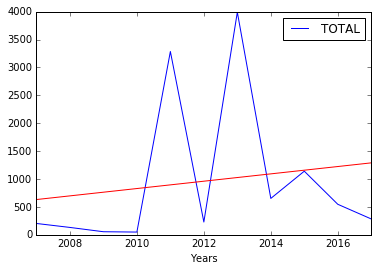

In [41]:
df_counts_pyear.plot(x="Years",y="TOTAL")
plt.plot(df_counts_pyear["Years"],slope*df_counts_pyear["Years"]+intercept,"-",color="red") 

# Without 2017

In [42]:
df_2007_2016 = df_counts_pyear[df_counts_pyear['Years'] != 2017]

In [43]:
lm = smf.ols(formula="TOTAL~Years",data=df_2007_2016).fit()

In [44]:
lm.params

Intercept   -266001.472727
Years           132.751515
dtype: float64

In [45]:
intercept, slope = lm.params

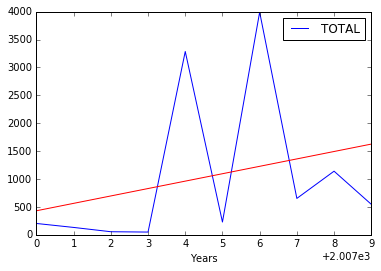

In [46]:
df_2007_2016.plot(x="Years",y="TOTAL")
plt.plot(df_2007_2016["Years"],slope*df_2007_2016["Years"]+intercept,"-",color="red")

In [47]:
df_2007_2016.to_csv('2007_2016_ör_fr.csv')

# Harmonising the Gerichtsschreiber

In [48]:
def harm(elem):
    try:
        elem = elem.replace('Greffier: ', '').replace('Greffière: ', '')
        elem = elem.replace('Greffier : ', '').replace('Greffière : ', '')
        elem = elem.replace('M. ', '').replace('Mme ', '')
        elem = elem.replace('M ', '').replace('Mme ', '')
        return elem
    except:
        None

In [49]:
df_bools['Schreiber harm'] = df_bools['Gerichtsschreiber'].apply(harm)

In [50]:
df_bools.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8124 entries, 2016-12-20 to 2012-03-30
Columns: 740 entries,  manière choquante l to Schreiber harm
dtypes: datetime64[ns](1), int64(734), object(5)
memory usage: 45.9+ MB


In [51]:
df_bools['Schreiber harm'].value_counts().head()

Dubey       1319
Parmelin    1040
Kurz         888
Charif       449
Tornay       364
Name: Schreiber harm, dtype: int64

# Merging with large file to sort out Abgeschrieben/Nichteingetreten

In [52]:
df = pd.read_csv('data/df_final_harm.csv')
df = df[['Aktennummer', 'Entscheid_harm']].copy()
df_ = df_bools.merge(df, left_on='Aktennummer', right_on='Aktennummer')
df_ = df_[df_['Entscheid_harm'] != 'Nicht eingetreten']

In [53]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5450 entries, 0 to 8135
Columns: 741 entries,  manière choquante l to Entscheid_harm
dtypes: datetime64[ns](1), int64(734), object(6)
memory usage: 30.9+ MB


# Working out, total by Clerk

In [55]:
df_totalelems = pd.DataFrame(df_.groupby('Schreiber harm')['TOTAL'].sum().sort_values(ascending=False))

# Working out number of appeals, we counted their involvement in

In [56]:
df = pd.read_csv('data/df_final_harm.csv')
df = df[df['Entscheid_harm'] != 'Nicht eingetreten']

In [57]:
df_sozrecht = df[df['recht_harm'] == 'Öffentliches Recht']

In [58]:
df_sozrecht['Schreiber_harm'] = df_sozrecht['Schreiber_harm'].apply(harm)

/Users/barneyjs/.virtualenvs/master/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [59]:
df_totalappeals = pd.DataFrame(df_sozrecht['Schreiber_harm'].value_counts())

# Merging total Elem Count with total Appeals by Clerk

In [60]:
df_final = df_totalelems.merge(df_totalappeals, how='left', left_index=True, right_index=True)

In [61]:
df_final.columns = [['ELEM 500 COUNT', 'TOTAL APPEALS']]
df_final['Elem pCase'] = round(df_final['ELEM 500 COUNT'] / df_final['TOTAL APPEALS'], 1)

# Gutheissungsquote nach Gerichtsschreiber

In [62]:
df_gut = pd.read_csv('data/schreiber_percent.csv')

In [63]:
df_gut = df_gut[['Schreiber', 'Gutgeheissen %']].copy()
def remove(elem):
    elem = elem.replace('.', '')
    return elem
df_gut['Schreiber'] = df_gut['Schreiber'].apply(remove)
df_gut.index = df_gut['Schreiber']
del df_gut['Schreiber']

# Merge with final df

In [64]:
df_final = df_final.merge(df_gut, how='left', left_index=True, right_index=True)

In [65]:
df_final.sort_values(by='Elem pCase', ascending=False).head(50)
df_final = df_final[df_final['TOTAL APPEALS'] > 30]

In [67]:
#df_final.drop('von', inplace=True)

In [68]:
df_final.columns = [['ELEM 500 COUNT', 'TOTAL APPEALS', 'ElempCase', 'Gutgeheissen']]

In [69]:
df_final.to_csv('ör_500_fr.csv')

# Is there a correlation between amout of copy pasted elements and the percentage of successful appeals?

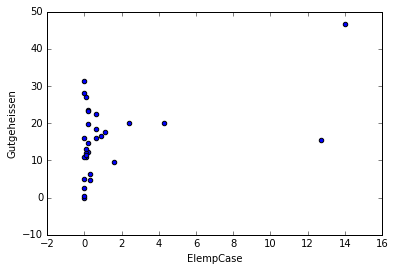

In [70]:
df_final.plot(kind='scatter', x='ElempCase', y='Gutgeheissen')

In [71]:
lm = smf.ols(formula="ElempCase~Gutgeheissen",data=df_final).fit()

In [72]:
intercept, slope = lm.params

In [73]:
lm.params

Intercept      -1.145668
Gutgeheissen    0.158031
dtype: float64

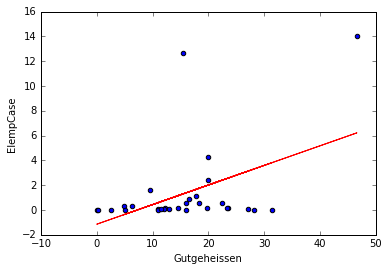

In [74]:
df_final.plot(kind='scatter', x="Gutgeheissen",y="ElempCase")
plt.plot(df_final["Gutgeheissen"],slope*df_final["Gutgeheissen"]+intercept,"-",color="red") 

In [75]:
df_final

,ELEM 500 COUNT,TOTAL APPEALS,ElempCase,Gutgeheissen
Schreiber harm,,,,
Vianin,3150,249.0,12.7,15.5
Sidi,2582,184.0,14.0,46.6
Kurz,1490,615.0,2.4,20.0
Tissot,692,162.0,4.3,20.0
Tornay,341,316.0,1.1,17.7
Dubey,212,611.0,0.3,4.8
Arn,203,223.0,0.9,16.6
Rittener,155,263.0,0.6,22.4
Parmelin,149,448.0,0.3,6.3


In [76]:
df_final.to_csv('ör_500_fr.csv')